In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Dell\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1


In [2]:
!pip install xgboost

In [3]:
import os
print("Path to Dataset files", path)
print(os.listdir(path))

Path to Dataset files C:\Users\Dell\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1
['WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [34]:
print(os.getcwd())

C:\Users\Dell\PROJECT FOR DATA SCIENCE


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
file_path = os.path.join(path, 'WA_Fn-UseC_-Telco-Customer-Churn.csv' )

In [7]:
df = pd.read_csv(file_path)

In [8]:
df.shape

(7043, 21)

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


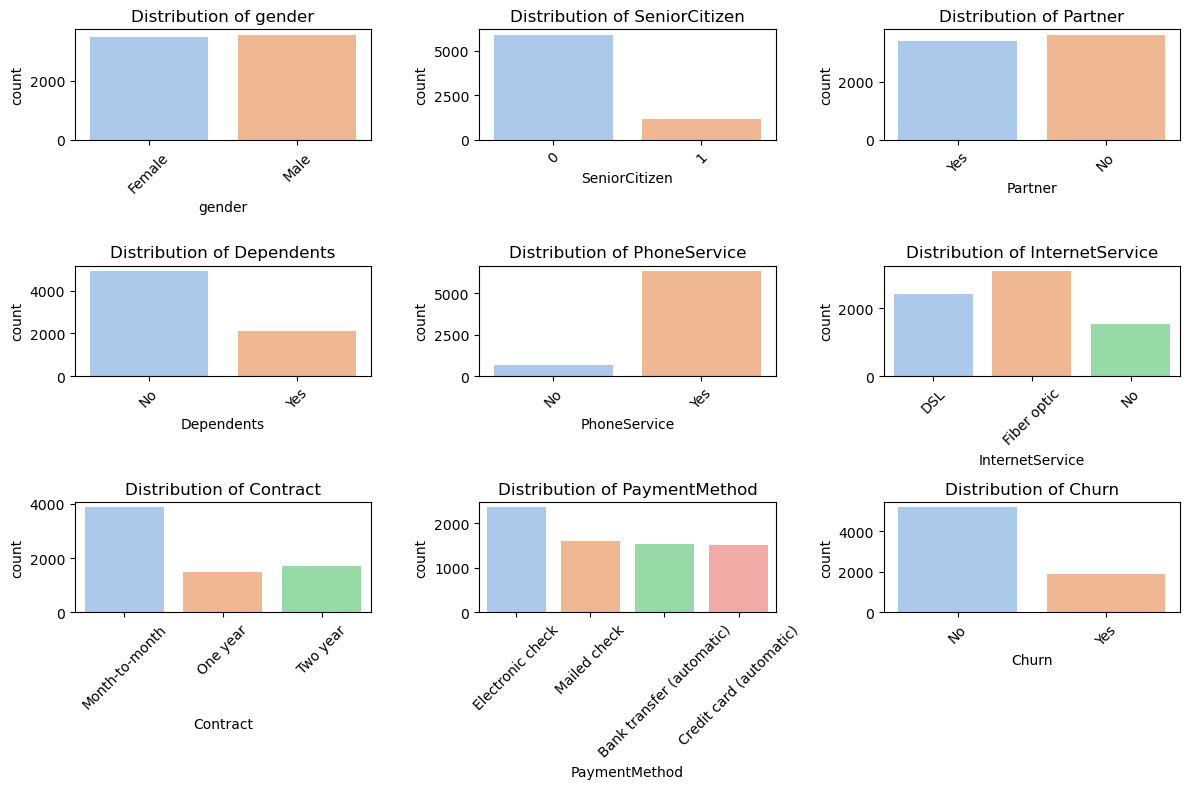

In [16]:
categorical_features = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "InternetService", "Contract", "PaymentMethod", "Churn"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, palette="pastel")
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

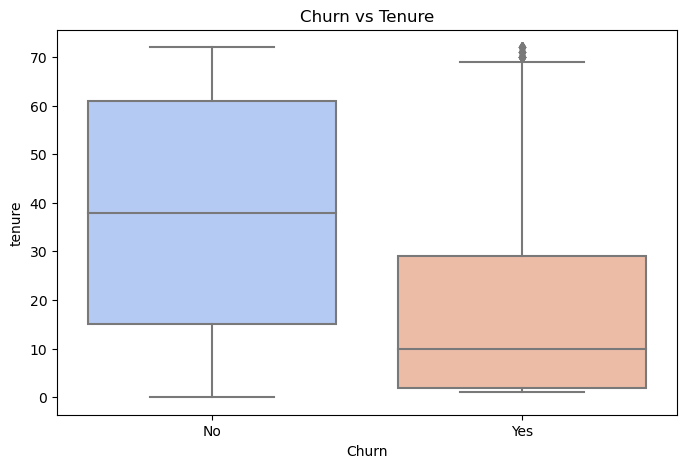

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Churn", y="tenure", palette="coolwarm")
plt.title("Churn vs Tenure")
plt.show()


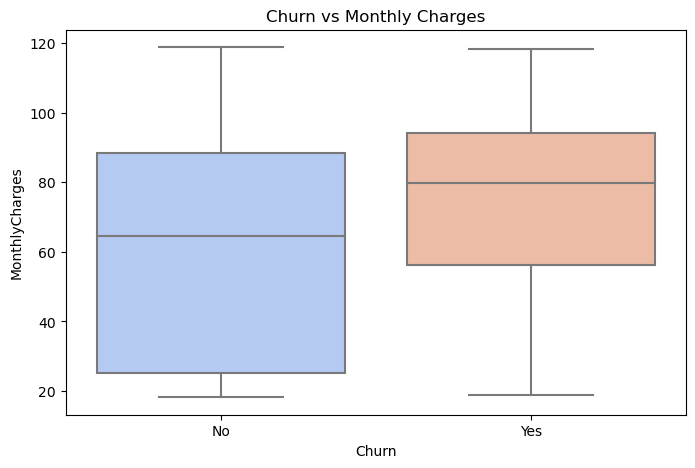

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Churn", y="MonthlyCharges", palette="coolwarm")
plt.title("Churn vs Monthly Charges")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_20268\1089472848.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")


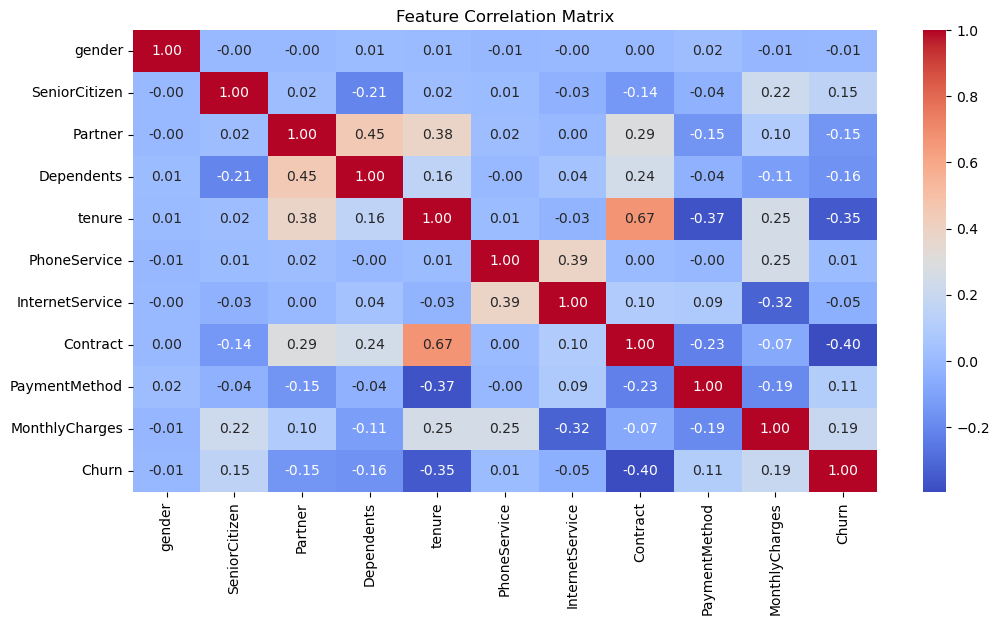

In [19]:
df_encoded = df.copy()
for col in categorical_features:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

# Correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [20]:


# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Fill missing TotalCharges with median
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


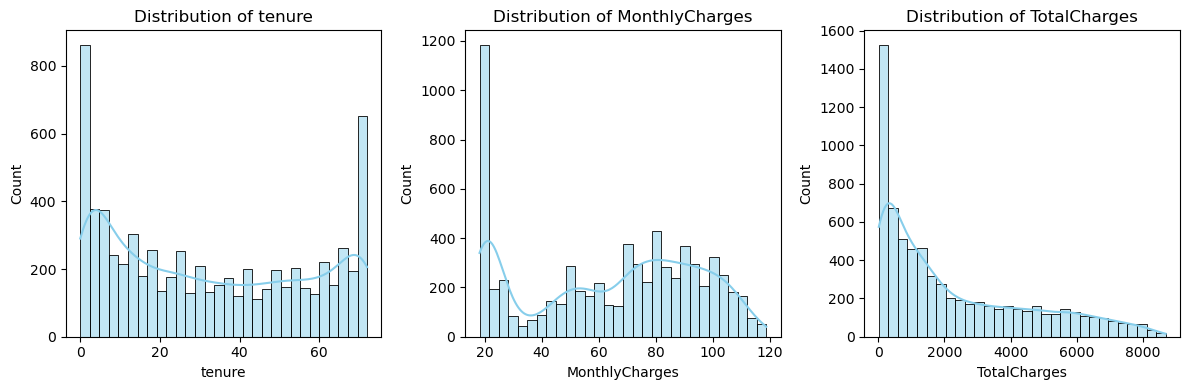

            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2281.916928
std      24.559481       30.090047   2265.270398
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    402.225000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000


In [21]:
# Select numeric columns
numeric_features = ["tenure", "MonthlyCharges", "TotalCharges"]

# Plot histograms
plt.figure(figsize=(12, 4))
for i, col in enumerate(numeric_features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], bins=30, kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Summary statistics
print(df[numeric_features].describe())

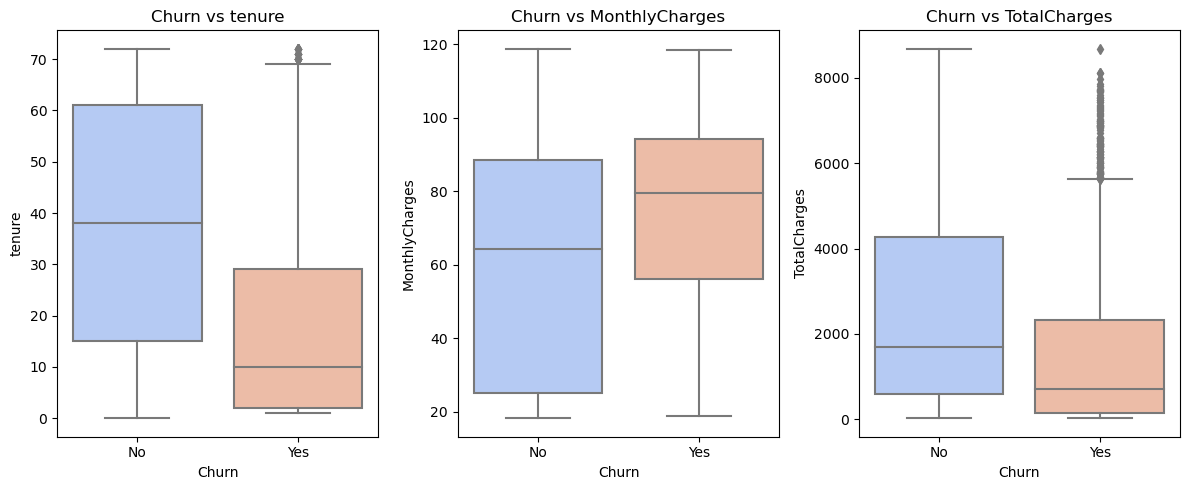

In [22]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(numeric_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, x="Churn", y=col, palette="coolwarm")
    plt.title(f"Churn vs {col}")
plt.tight_layout()
plt.show()

In [23]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Compute correlation
print(df[numeric_features + ["Churn"]].corr()["Churn"].sort_values(ascending=False))

Churn             1.000000
MonthlyCharges    0.193356
TotalCharges     -0.199037
tenure           -0.352229
Name: Churn, dtype: float64


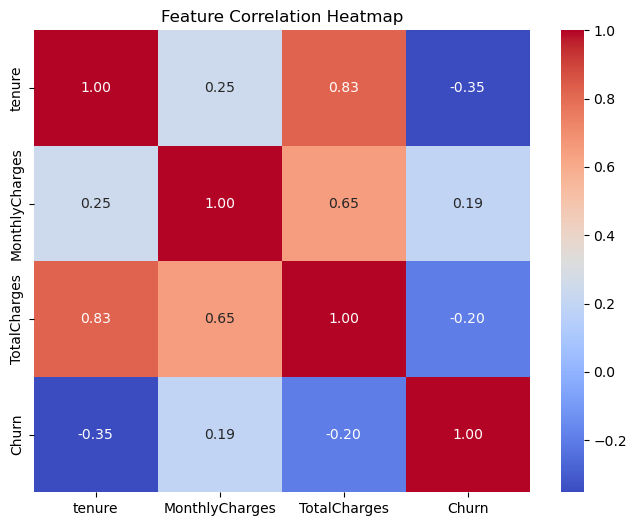

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_features + ["Churn"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

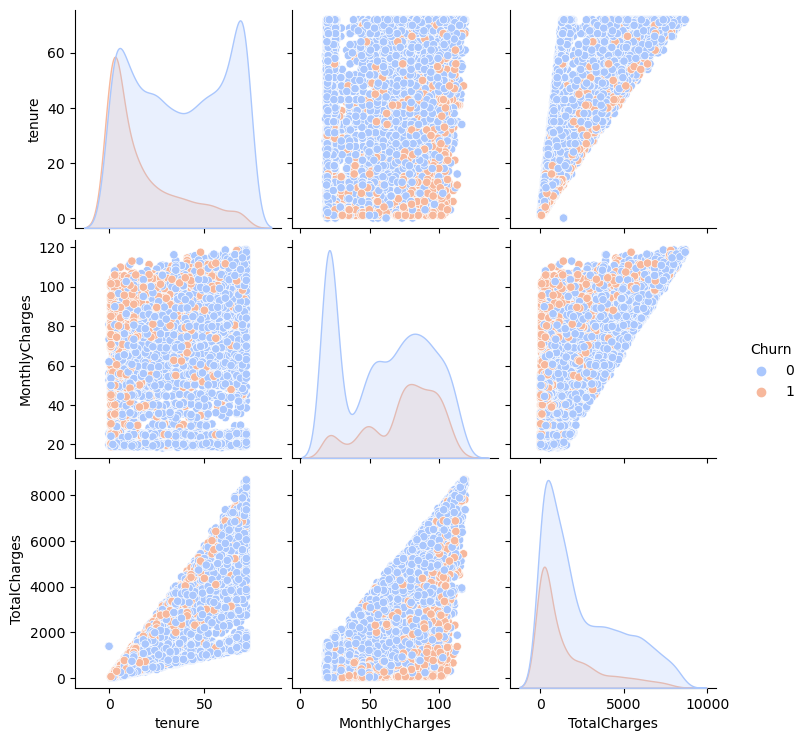

In [25]:
sns.pairplot(df[numeric_features + ["Churn"]], hue="Churn", palette="coolwarm")
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop rows with missing values
df.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'customerID':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [27]:
# Example: Create a feature indicating whether the customer has multiple services
df['MultipleServices'] = df[['PhoneService', 'InternetService']].sum(axis=1) > 1
df['MultipleServices'] = df['MultipleServices'].astype(int)


In [28]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Define features and target
X = df.drop(columns=["customerID", "Churn"])
y = df["Churn"]

# SelectKBest using mutual information (works with all values)
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_new = selector.fit_transform(X, y)

# Get selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)



Selected Features: Index(['tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'TechSupport', 'StreamingMovies', 'Contract', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


Logistic Regression Accuracy: 0.8062455642299503
Random Forest Accuracy: 0.7913413768630234
XGBoost Accuracy: 0.794180269694819


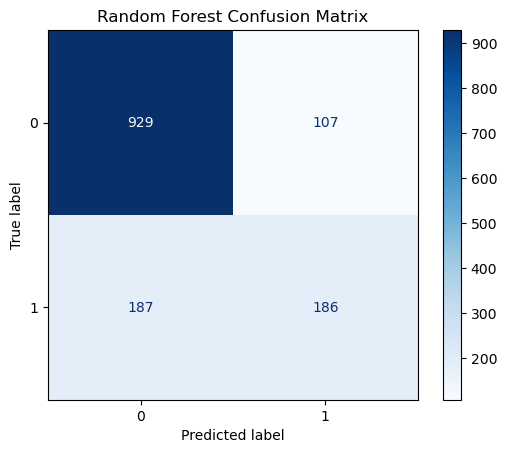

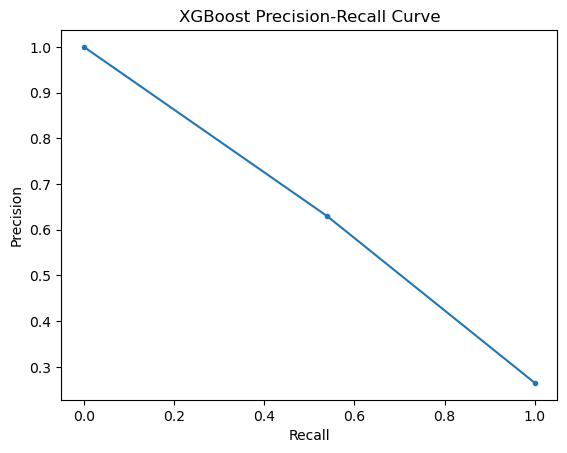

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap="Blues")

plt.title('Random Forest Confusion Matrix')
plt.show()

# Precision-Recall Curve for XGBoost
precision, recall, _ = precision_recall_curve(y_test, y_pred_xgb)

plt.plot(recall, precision, marker='.')
plt.title('XGBoost Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


In [31]:
df['Churn_Prediction'] = xgb.predict(df[selected_features])


In [32]:
df['Churn_Prediction']

0       1
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn_Prediction, Length: 7043, dtype: int32

In [33]:
df.to_csv("telco_customer_churn_cleaned.csv", index=False)
